# Hoja de Trabajo 3

## Problema 1

Utilice expresiones regulares para validar las siguintes situaciones:
1. Implemente una regex para validar un correo electrónico en general, a continuación se muestran algunos ejemplos.  


- Guate.360-porelmundo@miguate.com
- Miercoles3@hotmail.com
- Progra3.galileo@galileo.edu

**Respuesta:**
      [a-zA-Z]+(\w|(\.|\-))*\@\w+\.*\w*

**Validación en Herramienta:**
<img src="P1Val.jpg">


2. Implemente una regex para validar la dirección url de una página web con los tipos de domino (.com, .org, .edu). Note que la url incluye el protocolo (http o https) y los símbolos (//www.),a continuación se muestran algunos ejemplos: 


* https://www.guate360-porelmundo.com
* http://www.a2.net
* https://www.galileo.edu
* http://www.8.org (No valida)

**Respuesta:**
      (http(s)?|HTTP(S)?)://w{3}\.[a-zA-Z](\.\w|\-|\w*)+

**Validación en Herramienta:**
<img src="P2Val.jpg">


3. Implemente una regex para validar una MAC Address, notar que las mac addres están divididas en 6 bloques de caracteres hexadecimales, es decir que los símbolos solo pueden variar del 0 al 9 y las letras de la A a la F. A continuación se muestran algunos ejemplos:


* 5A 6F AF 8C 9B 1D
* 6D 6C 4D 3A EB 3F
* 3A 7C FA C8 6D 4J (no valida por que el ultimo bloque contiene una J)

**Respuesta:** 
      (([A-F]|[0-9]){2}\s){6}

**Validación en Herramienta:**
<img src="P3Val.jpg">


4. Implemente una regex para validar una dirección IPv4, notar que las direcciones IPv4 están divididas en 4 bloques de valores los cuales solo pueden ir desde 0 hasta 255, una ip donde algunos de sus bloques sea mayor a 255 no es valida, ademas tome en cuenta que cada bloque está separada por un punto. A continuación se muestran algunos ejemplos:


* 192.16.8.1
* 234.56.78.90
* 1.2.3.4
* 192.168.45.345 (no valida por que el ultimo bloque es mayor a 255)

**Respuesta:**
      (([1][0-9]|[1-9])[0-9]?|2[0-4][0-9]|25[0-5])\.(([01]?[0-9][0-9]?|2[0-4][0-9]|25[0-5])\.){2}([01]?[0-9][0-9]?|2[0-4][0-9]|25[0-5])

**Validación en Herramienta:**
<img src="P4Val.jpg">


5. Implemente una regex para validar una fecha con la secuencia día-mes-año donde el día, mes y año puedan estar separados ya sea por el caracter / o el caracter - o el caracter ., notar que las fechas son validas si los si los días están definidos desde el 1 al 31, el mes del 1 al 12 y el año de 2000 al 2019. También debe tomar en cuenta que los días y meses pueden estar escritos ya sea con uno o dos caracteres por ejemplo: Enero puede escribirse como 1 o como 01. Los años también pueden expresarse ya sea con dos o con cuatro caracteres por ejemplo:19 o 2019 son validos. A continuación se muestran algunos ejemplos:


* 20/1/2019
* 12.03.2005
* 31-11-08
* 1-1-2012
* 12-12-22 (no valida, por que el año supera al 2019).

**Respuesta:**
      ([12][0-9]|3[01]|[0]?[1-9])(/|\-|\.)([0]?[1-9]|[1][0-2])(/|\-|\.)(20)?[01][0-9]

**Validación en Herramienta:**
<img src="P5Val.jpg">


## Problema 2

En la carpeta encontrará adjuntos 21 documentos que tiene 100 fechas en la secuencia días-mes-año pero con distinto separador y distinto formato de mes, en algunos casos aparece un numero y en otros el nombre del mes en ingles, por ejemplo: Enero pueder aparecer como 1 o como Jan. Utilice Python y expresiones regulares para encontrar el día, mes y año promedio total del los 21
archivos, los resultados deben ser un double.

#### Cargamos las fechas de los 21 archivos

In [1]:
##Cargamos las librerias que nos servirán
import numpy as np
import pandas as pd
import re

In [46]:
#Aquí colocaremos el conjunto de fechas de todos los archivos
data = np.empty([0,1],dtype='str')

#Leemos los 21 archivos
for i in range(1,22):
    #Armamos dinamicamente el nombre del archivo
    archivo="Datos/D"+str(i)+".txt"
    #leemos la información del archivo
    datafile = pd.read_csv(archivo, sep=" ", header=None)
    #Dejamos de una columna la información
    dataPrep = np.array(datafile[0].values).reshape(-1,1)
    #Append a la estructura data
    data=np.vstack((data,dataPrep))
#Comprobamos la cantidad de registros almacenados
data.shape

(21000, 1)

#### Extraemos la información de días/meses/años de las fechas (Usando expresiones regulares)

In [142]:
#Aquí almacenaremos los días extraidos
dias=np.empty([0,1],dtype='int')
meses=np.empty([0,1],dtype='int')
años=np.empty([0,1],dtype='int')

#Este diccionario nos ayudará a convertir meses en texto a valor númerico
mes_dic = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9, "oct":10,"nov":11, "dec":12}

#Recoremos cada fecha almacenada
for s in data[:,0]:
    #ponemos en minuscula el texto
    s = s.lower()
    #Definimos la expresión Regular
    date = re.compile("([12][0-9]|3[01]|[0]?[1-9])(/|\-|\.)([0]?[1-9]|[1][0-2]|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)(/|\-|\.)((20)?[01][0-9])")
    #Obtenemos el dia
    find= date.findall(s)
    #Lo convertimos a valor númerico
    #Convertimos a númerico el valor del dia
    dia = int(find[0][0])
    #Convertimos a númerico el valor del mes
    str_mes = find[0][2]
    if str_mes.isdigit(): #Si es digito
        mes = int(find[0][2]) 
    else:
        mes = mes_dic.get(str_mes)
    año = int(find[0][4])
    #lo adherimos a nuestros arreglos
    dias=np.vstack((dias,dia))
    meses = np.vstack((meses,mes))
    años = np.vstack((años,año))
#Comprobamos la cantidad de días, meses, años almacenados
print("Cantidad de Registros Procesados, Días {} Meses {} Años {}".format(dias.shape[0],meses.shape[0],años.shape[0]))

Cantidad de Registros Procesados, Días 21000 Meses 21000 Años 21000


#### Promedios de la Información 

In [141]:
print("El Promedio de los días obtenidos es ",round(np.average(dias),2))
print("El Promedio de los meses obtenidos es ",round(np.average(meses),2))
print("El Promedio de los años obtenidos es ",round(np.average(años),2))

El Promedio de los días obtenidos es  15.62
El Promedio de los meses obtenidos es  6.47
El Promedio de los años obtenidos es  2016.69


## Problema 3

Descargue el Dataset el cual contiene aproximadamente 800,000 tweets de diversos temas. Usando CoLab y expresiones regulares. Determine los 3 usuarios más populares dentro del dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:
* Content: Tweet.
* Metadata: ID, Timestamp, Length (este valor hay que calcularlo).

In [2]:
#Leemos el archivo de tweets
tweets = pd.read_csv("tw_source.csv",header=None,encoding='latin-1')
#Asignamos nombres a las columnas
tweets.columns=["Bloque","ID","Fecha","REF","User","Content"]
#mostramos los primeros 10 registros
tweets.head(10)

,Bloque,ID,Fecha,REF,User,Content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


#### Determinar los usuarios más populares

Para determinar los usuarios más populares, no solo se tomará en cuenta el usuario que efectuó más tweets sino el que tuvo más menciones.

Descompondremos el contenido del tweet y por cada usuario que se tuvo una mención se creará un nuevo registro en la tabla con el contenido del tweet donde fue mencionado.

In [3]:
#convertimos la columna de content a Str
tweets['Content'] = tweets['Content'].astype(str)

In [4]:
#Buscamos todos los usuarios que han sido referenciados en los Tweets
RefUsers=tweets['Content'].str.extractall('(@)(\w+)(\s)')[1].values

In [5]:
#Vemos cuando usuarios fueron mencionados en los contenidos de los tweets
print("Cantidad de Usuarios mencionados en Tweets {}".format(RefUsers.shape[0]))

Cantidad de Usuarios mencionados en Tweets 761785


In [6]:
#Unificamos una única columna con los usuarios que efectuaron los tweets, como aquellos mencionados
UsersUnified= np.concatenate((tweets['User'].values,RefUsers)).astype(str)
#pasamos todo a minusculas
UsersUnified= np.char.lower(UsersUnified).astype(object)

In [7]:
#Vemos cantidad de registros de usuarios combinado con menciones en tweets
print("Cantidad de Usuarios en mención y con tweets en Tweets {}".format(UsersUnified.shape[0]))

Cantidad de Usuarios en mención y con tweets en Tweets 2361785


In [8]:
#Ahora hacemos un conteo por usuario de tweets y menciones
unique, counts = np.unique(UsersUnified, return_counts=True)
CountbyUser=np.hstack((unique.reshape(-1,1),counts.reshape(-1,1)))

In [9]:
#Buscamos los tres usuarios más populares dentro del dataset
pd.DataFrame(data=CountbyUser, columns=["User", "Count"]).sort_values(by='Count', ascending=False).head(3)

,User,Count
531472,mileycyrus,4386
789254,tommcfly,3860
192308,ddlovato,3355


#### Creamos los corpus por artista

Se armará un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:
- Content: Tweet.
- Metadata: ID, Timestamp, Length


In [79]:
#Creamos función generica que arma Corpus para el usuario Seleccionado
def createCorpus(user):
    
    #Si el usuario contiene letras mayusculas lo convertimos
    user= user.lower()
    
    #Buscamos aquellos tweets efectuados por el usuario
    FromUser=tweets[tweets['User'].str.lower()==user]
    
    #Buscamos todas los tweets que hacen mención al usuario
    MentionUser= tweets[tweets['Content'].str.contains('@'+user)]
    
    #Unimos todos los tweets del Usuario
    UserAll = FromUser.append(MentionUser)
    
    #Quitamos las menciones del contenido del Tweet para que no se confunda con contenido real
    UserAll['Content']=UserAll['Content'].str.replace('(@)(\w+)(\s)','')

    #Quitamos las direcciones web en los tweets
    UserAll['Content']=UserAll['Content'].str.replace('(http)[s]*://(.)+(\s)','')
    
    #Buscamos la información para la metadata
    MetaData=UserAll[['ID','Fecha']]
    MetaData["length"]=UserAll['Content'].str.len()
    
    #Armamos el Contenido para nuestro Corpus
    Content = UserAll['Content']
    
    #armamos el corpus
    Corpus= pd.DataFrame({'Content': Content.values, 'MetaData':MetaData.values.tolist()})
    
    #Regresamos la información del Corpus
    return Corpus

Armamos los corpus para los tres usuarios seleccionados

In [80]:
#Armos el corpus para el usuario mileycyrus
Miley_Corps= createCorpus("mileycyrus")

#Armos el corpus para el usuario tommcfly
Tomm_Corps= createCorpus("tommcfly")

#Armos el corpus para el usuario tommcfly
Ddlovato_Corps= createCorpus("ddlovato")

<ipython-input-79-5a56f7b743c7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MetaData["length"]=UserAll['Content'].str.len()


Mostramos los corpus creados

In [81]:
Miley_Corps.head()

,Content,MetaData
0,in makeup and hair why does mother nature hat...,"[1468751105, Tue Apr 07 03:32:08 PDT 2009, 117]"
1,i have disorder. i can not sleep! i stay up al...,"[1932948580, Tue May 26 22:36:28 PDT 2009, 84]"
2,,"[1964247674, Fri May 29 13:56:45 PDT 2009, 0]"
3,plz dont fall in love with tokyo and never com...,"[1965539102, Fri May 29 16:05:53 PDT 2009, 53]"
4,at hannah montana set.... im missing tennessee...,"[1966404364, Fri May 29 17:42:18 PDT 2009, 58]"


In [82]:
Tomm_Corps.head()

,Content,MetaData
0,"Ok, i've eaten some food and now bored to deat...","[1963476507, Fri May 29 12:46:52 PDT 2009, 127]"
1,"up and packed, looking at a gorgeous sunny bea...","[1979690548, Sun May 31 04:06:40 PDT 2009, 123]"
2,why not? i think i do!!!,"[2054700958, Sat Jun 06 07:54:48 PDT 2009, 25]"
3,...Pissed off than you can imagine. Think we c...,"[2069335111, Sun Jun 07 15:41:19 PDT 2009, 101]"
4,we'd love to. Not up to us I'm afraid!,"[2184571529, Mon Jun 15 16:06:14 PDT 2009, 39]"


In [83]:
Ddlovato_Corps.head()

,Content,MetaData
0,I miss you... come over and say bye before I ...,"[1964289934, Fri May 29 14:00:26 PDT 2009, 53]"
1,Still watching Nights in Rodanthe..... It's at...,"[1978158967, Sat May 30 22:35:20 PDT 2009, 72]"
2,Watching Notorious for the third time... I wis...,"[2202639245, Tue Jun 16 22:08:47 PDT 2009, 72]"
3,My voice is shot. Please pray for it's streng...,"[2256625379, Sat Jun 20 13:03:29 PDT 2009, 69]"
4,Please come home.,"[2259039728, Sat Jun 20 16:55:09 PDT 2009, 18]"


Posterior a tener sus 3 corpus creados, responda: ¿Razón por la que citan a ese usuario? para esto es necesario que extraiga el contexto de cada tweet y verique cuales son las palabras que más rodean al nombre de usuario. Para extraer un contexto válido y debido a la naturaleza del tipo de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:
1. Remover stopwords. 
2. Realizar stemming y lemmatización.
3. Mostrar un wordcloud con el top 10 para cada usuario.

In [84]:
import spacy 
import spacy.cli 

#Descargamos el Modelo de Spacy en Ingles
spacy.cli.download('en_core_web_sm')
nlp= spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [141]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

#Creamos Función Generica para Normalizar el Texto y Mostrar el WordCloud
def wordCloudUser(corpus, max_words=10):
    #Extramos del Corpus el Contenido de los tweets
    corpusUser = corpus.Content

    #Quitamos los caracteres que no sean letras o números en los tweets
    corpusUser=corpusUser.str.replace('[^a-zA-Z0-9\s{1}]','')
    
    #Quitamos StopWords, hacemos Stemming y Lemmatizamos el Texto
    #En este arreglo dejaremos el texto final
    TextoLematizado = []
    #Recorremos el contenido de cada tweet
    for contenido in corpusUser:
        #Tokenimos el contenido
        tokens = nlp(contenido)
        content_filtered = ""
        #Recorremos cada Token
        for token in tokens:
            #Vemos que el token no sea un stop Word
            if token.is_stop == False and token.text.strip() != '':
                #Sacamos el lemma del Token
                content_filtered= content_filtered+token.lemma_+" "
        TextoLematizado.append(content_filtered.strip())
        
    corpus.Content=TextoLematizado
    
    #Pasamos el Texto de Todo el Corpus a una Cadena
    comment_words=''.join(corpus.Content.tolist())
    
    #Armamos el WorCloud - Desplegando el Top 10 de Palabras
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10, max_words=max_words).generate(comment_words) 
    
    #Mostramos la imagen WordCloud                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

#### Palabras que rodean al usuario

1. Se muestra la información que rodea al usuario @mileycyrus

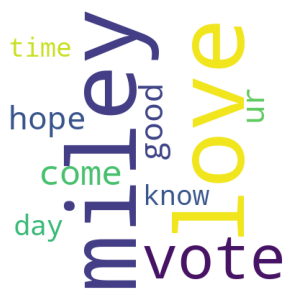

In [142]:
wordCloudUser(Miley_Corps)

2. Se muestra la información que rodea al usuario @tommcfly

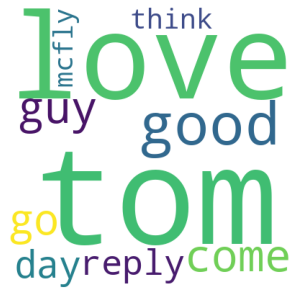

In [143]:
wordCloudUser(Tomm_Corps)

3. Se muestra la información que rodea al usuario @ddlovato

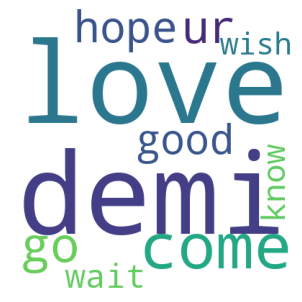

In [144]:
wordCloudUser(Ddlovato_Corps)